In [1]:
# Import Library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = data = pd.read_csv('matches.csv')
data.head()

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,...,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,...,Match Report,NaN,17.0,8.0,13.9,0.0,0,0,2024,ManchesterCity
1,3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,...,Match Report,NaN,14.0,4.0,17.9,0.0,0,0,2024,ManchesterCity
2,4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,...,Match Report,NaN,29.0,9.0,17.3,2.0,0,1,2024,ManchesterCity
3,5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,...,Match Report,NaN,6.0,4.0,14.8,0.0,1,1,2024,ManchesterCity
4,6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,...,Match Report,NaN,29.0,13.0,16.4,1.0,0,0,2024,ManchesterCity


In [3]:

data.tail()

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,...,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
755,36,2024-04-24,20:00,Premier League,Matchweek 29,Wed,Away,L,2,4,...,Match Report,NaN,10.0,4.0,17.8,1.0,0,0,2024,SheffieldUnited
756,37,2024-04-27,15:00,Premier League,Matchweek 35,Sat,Away,L,1,5,...,Match Report,NaN,15.0,4.0,13.5,0.0,0,0,2024,SheffieldUnited
757,38,2024-05-04,15:00,Premier League,Matchweek 36,Sat,Home,L,1,3,...,Match Report,NaN,16.0,4.0,18.0,0.0,1,1,2024,SheffieldUnited
758,39,2024-05-11,15:00,Premier League,Matchweek 37,Sat,Away,L,0,1,...,Match Report,NaN,13.0,1.0,21.0,0.0,0,0,2024,SheffieldUnited
759,40,2024-05-19,16:00,Premier League,Matchweek 38,Sun,Home,L,0,3,...,Match Report,NaN,6.0,1.0,18.0,1.0,0,0,2024,SheffieldUnited


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    760 non-null    int64  
 1   Date          760 non-null    object 
 2   Time          760 non-null    object 
 3   Comp          760 non-null    object 
 4   Round         760 non-null    object 
 5   Day           760 non-null    object 
 6   Venue         760 non-null    object 
 7   Result        760 non-null    object 
 8   GF            760 non-null    int64  
 9   GA            760 non-null    int64  
 10  Opponent      760 non-null    object 
 11  xG            760 non-null    float64
 12  xGA           760 non-null    float64
 13  Poss          760 non-null    float64
 14  Attendance    760 non-null    float64
 15  Captain       760 non-null    object 
 16  Formation     760 non-null    object 
 17  Referee       760 non-null    object 
 18  Match Report  760 non-null    

In [5]:
# Menampilkan jumlah nilai hilang per kolom
missing_data = data.isnull().sum()
print(missing_data)

Unnamed: 0        0
Date              0
Time              0
Comp              0
Round             0
Day               0
Venue             0
Result            0
GF                0
GA                0
Opponent          0
xG                0
xGA               0
Poss              0
Attendance        0
Captain           0
Formation         0
Referee           0
Match Report      0
Notes           760
Sh                0
SoT               0
Dist              0
FK                0
PK                0
PKatt             0
Season            0
Team              0
dtype: int64


In [6]:
data.drop(columns=['Notes', 'Unnamed: 0'], inplace=True)


In [7]:
# Mengecek jumlah baris yang duplikat
data.duplicated().sum()


np.int64(0)

In [8]:
# Konversi Date ke type data yang benar
data['Date'] = pd.to_datetime(data['Date'])


In [9]:
# Ringkasan statistik untuk data numerik
data.describe()


,Date,GF,GA,xG,xGA,Poss,Attendance,Sh,SoT,Dist,FK,PK,PKatt,Season
count,760,760.000000,760.000000,760.000000,760.000000,760.0000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.0
mean,2024-01-05 22:10:06.315789312,1.639474,1.639474,1.550263,1.550263,50.0000,38613.313158,13.660526,4.668421,16.711842,0.372368,0.126316,0.140789,2024.0
min,2023-08-11 00:00:00,0.000000,0.000000,0.000000,0.000000,18.0000,10290.000000,1.000000,0.000000,7.000000,0.000000,0.000000,0.000000,2024.0
25%,2023-10-28 18:00:00,1.000000,1.000000,0.900000,0.900000,40.0000,24444.750000,9.000000,3.000000,14.900000,0.000000,0.000000,0.000000,2024.0
50%,2023-12-30 00:00:00,1.000000,1.000000,1.400000,1.400000,50.0000,38181.000000,13.000000,4.000000,16.700000,0.000000,0.000000,0.000000,2024.0
75%,2024-03-30 00:00:00,2.000000,2.000000,2.100000,2.100000,60.0000,53371.750000,17.000000,6.000000,18.400000,1.000000,0.000000,0.000000,2024.0
max,2024-05-19 00:00:00,8.000000,8.000000,7.000000,7.000000,82.0000,73612.000000,36.000000,15.000000,39.900000,3.000000,2.000000,2.000000,2024.0
std,NaN,1.331297,1.331297,0.891314,0.891314,13.7495,17952.911952,6.058391,2.645612,2.856164,0.598218,0.359097,0.377104,0.0


In [10]:
# Ringkasan distribusi untuk kolom kategorikal
data.describe(include=['object'])


,Time,Comp,Round,Day,Venue,Result,Opponent,Captain,Formation,Referee,Match Report,Team
count,760,760,760,760,760,760,760,760,760,760,760,760
unique,15,1,38,7,2,3,20,69,18,28,1,20
top,15:00,Premier League,Matchweek 1,Sat,Away,W,Burnley,Max Kilman,4-2-3-1,Anthony Taylor,Match Report,ManchesterCity
freq,264,760,20,390,380,298,38,37,296,54,760,38


C:\Users\rendy\AppData\Local\Temp\ipykernel_10984\2613887657.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=poss_by_venue, x='Poss', y='Venue', palette='Blues_d')


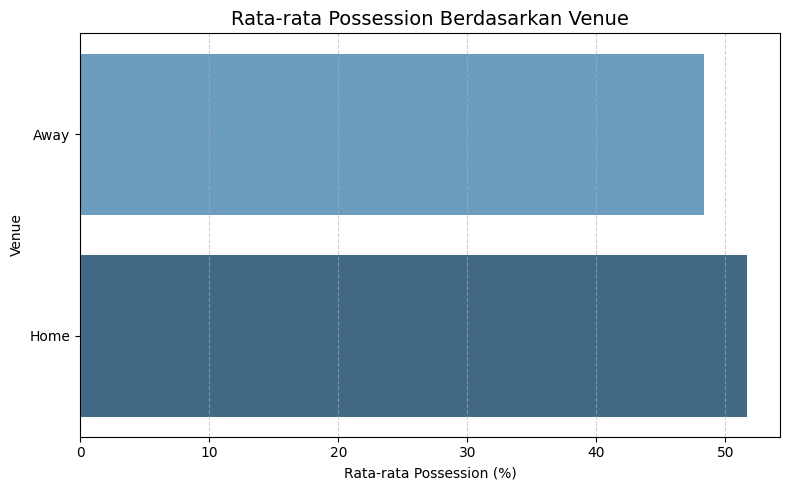

In [11]:
poss_by_venue = df.groupby('Venue')['Poss'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(data=poss_by_venue, x='Poss', y='Venue', palette='Blues_d')
plt.title('Rata-rata Possession Berdasarkan Venue', fontsize=14)
plt.xlabel('Rata-rata Possession (%)')
plt.ylabel('Venue')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

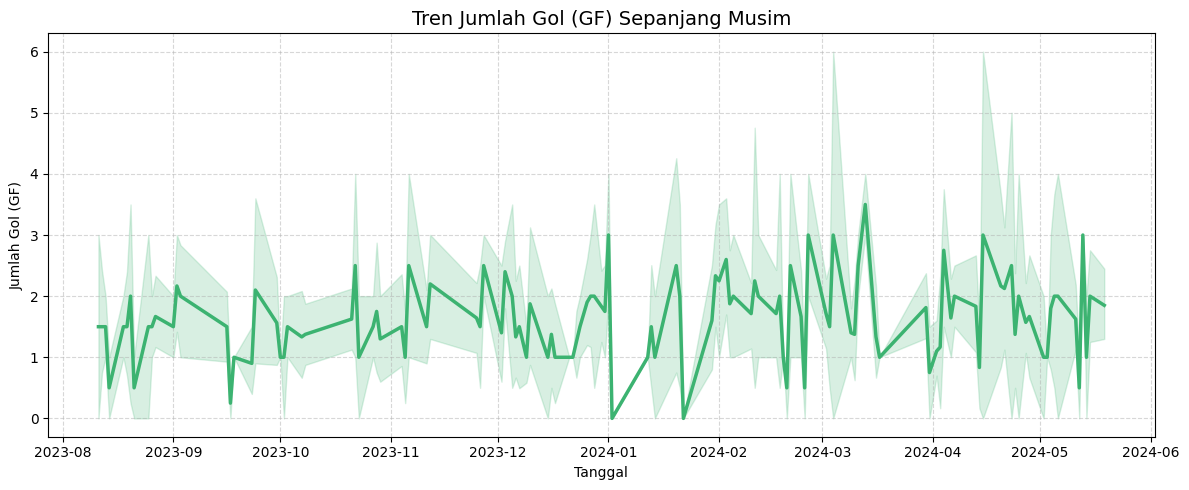

In [12]:
# Pastikan kolom 'Date' sudah dalam format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Urutkan berdasarkan tanggal
df_sorted = df.sort_values('Date')

# Visualisasi line chart tren gol
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_sorted, x='Date', y='GF', color='mediumseagreen', linewidth=2.5)
plt.title('Tren Jumlah Gol (GF) Sepanjang Musim', fontsize=14)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Gol (GF)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
